## Importing Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [6]:
#Loading the dataset
df = pd.read_csv('spam.csv', delimiter = ',', encoding = 'latin-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
#Drop the unnecessary columns, that don't reveal much information about our dataset
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True, axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 0, 'V1')

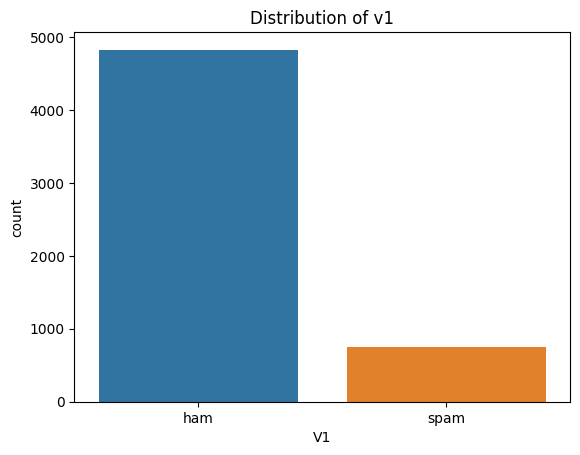

In [9]:
#Plotting the distribution
import seaborn as sns

sns.countplot(data = df, x = 'v1')
plt.title("Distribution of v1")
plt.xlabel("V1")

In [10]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

## Splitting the data

In [11]:
X = df['v2']
y = df['v1']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [18]:
X_train.shape

(4736,)

Label Encoding (v2) 

In [19]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
#y_train = y_train.reshape(-1,1)

In [20]:
y_train.shape

(4736,)

## Data Processing

**-> Tokenize the data and convert text to sequences**

Converting text to sequences involves representing each word or token in the text as a numerical value or index. This step is typically performed using a process called tokenization, where each word is assigned a unique identifier.

Creating an embedding layer is a subsequent step that involves mapping these tokenized indices to dense vector representations, often referred to as word embeddings.

**-> Add padding to ensure that all the sequences have the same shape.**

Padding is a technique used in natural language processing (NLP) to ensure that sequences have the same length or shape. In the context of sequence processing, padding involves adding special tokens or values to the sequences to make them equal in length.



In [23]:
from keras.utils.data_utils import pad_sequences

max_words = 1000 #max number of words to consider in the vocabulary
max_len = 150 #creates a tokenizer object
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train) #fits the tokenizer to train data
sequences = tok.texts_to_sequences(X_train) #transform data trained into sequences
padded_sequences = pad_sequences(sequences,maxlen=max_len) #applying padding
padded_sequences_array  = np.array(padded_sequences)

In [ ]:
padded_sequences.shape

(4736, 150)

# RNN

In [25]:
def RNN():
    inputs = Input((150,))
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(2,name='out_layer',activation='sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [36]:
model = RNN()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [37]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 2)                 514 

In [38]:
Y_train.shape

(4736,)

In [39]:
model.fit(padded_sequences,y_train,batch_size=128,epochs=15,
          validation_split=0.1)#callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/15
34/34 [==============================] - 13s 323ms/step - loss: 0.2844 - accuracy: 0.8895 - val_loss: 0.1111 - val_accuracy: 0.9831
Epoch 2/15
34/34 [==============================] - 10s 302ms/step - loss: 0.0685 - accuracy: 0.9819 - val_loss: 0.0659 - val_accuracy: 0.9810
Epoch 3/15
34/34 [==============================] - 10s 305ms/step - loss: 0.0442 - accuracy: 0.9873 - val_loss: 0.0495 - val_accuracy: 0.9810
Epoch 4/15
34/34 [==============================] - 9s 273ms/step - loss: 0.0338 - accuracy: 0.9901 - val_loss: 0.0870 - val_accuracy: 0.9747
Epoch 5/15
34/34 [==============================] - 10s 286ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0728 - val_accuracy: 0.9747
Epoch 6/15
34/34 [==============================] - 10s 305ms/step - loss: 0.0206 - accuracy: 0.9948 - val_loss: 0.0467 - val_accuracy: 0.9873
Epoch 7/15
34/34 [==============================] - 10s 307ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0553 - val_accuracy: 0.9831


In [42]:
#Processing the text data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = np.array(pad_sequences(test_sequences,maxlen=max_len))

In [44]:
#Evaluating model on the test set
test_sequences_matrix.shape

(836, 150)

In [52]:
#Encoding the y_test
y_test = y_test = encoder.fit_transform(y_test)

In [53]:
accuracy = model.evaluate(test_sequences_matrix, y_test)

27/27 [==============================] - 1s 47ms/step - loss: 0.0372 - accuracy: 0.9928


In [56]:
print("Loss is: ",accuracy[0])
print("Accuracy is: ",accuracy[1])

Loss is:  0.037194643169641495
Accuracy is:  0.9928229451179504
